<a href="https://colab.research.google.com/github/HimanshuSahoo/DATA-SCIENCE/blob/main/Himanshu_BS_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
from time import time

In [ ]:
#data processing libraries 

from sklearn import preprocessing

import nltk
from nltk.stem.porter import PorterStemmer

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Evaluate the model
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
def get_page(url):
    page = requests.get(url)
    soup = bs(page.text,"lxml")
    return soup

In [ ]:
def get_links(soup):
    links=[]
    listings = soup.find_all('a' ,{'class' : 'bookTitle'})
    base_url="https://www.goodreads.com"
    for i in listings:
        book_link = i.get("href")
        complete_link  = base_url + book_link
        links.append(complete_link)
    return links

In [ ]:
#extract info from each link


def extract_info(links):
    for link in links:
        res = requests.get(link).text
        book_soup = bs(res, 'html.parser')
        try:
            book_id = book_soup.find(
                'div', {'id': 'buyButtonContainer'}).get('data-book-id')
            title = book_soup.find('h1', {'id': "bookTitle"}).text.strip()
            author = book_soup.find('span', {'itemprop': "name"}).text.strip()
            average_rating = book_soup.find(
                'span', {'itemprop': "ratingValue"}).text.strip()
            #description = book_soup.find('div',{'id':"description"}).text.strip()
            description = book_soup.find('div', {'id': "description"}).find_all('span')[
                1].text.strip()
            genre = book_soup.find(
                'a', {'class': "actionLinkLite bookPageGenreLink"}).text.strip()
            book_image_url = book_soup.find(
                'img', {'id': 'coverImage'}).get('src').strip()
            book_url = link
        except AttributeError:
            continue

        book = {'book_id': book_id, 'title': title, 'author': author, 'average_rating': average_rating,
                'genre': genre, 'description': description, 'url': book_url, 'image_url': book_image_url}
        all_books.append(book)
    return len(all_books)

In [ ]:
all_books = []
books  = pd.DataFrame()
for page in range(1,51):
    url = "https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page={}".format(page)
    soup = get_page(url)
    links = get_links(soup)
    (extract_info(links))

IndexError: list index out of range

In [ ]:
books = pd.DataFrame(all_books)

In [ ]:
books.to_csv('books_data_40.csv')

### Project On Book Recommendation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### EDA

In [ ]:
books = pd.read_csv("books_data.csv")
books

,Unnamed: 0,title,author,average_rating,genre,description
0,0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...
1,1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...
2,2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...
3,3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...
4,4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...
...,...,...,...,...,...,...
3347,3347,Asylum: A Hidden Tale - Sinister Tales,Anna Gallegos,4.18,Horror,Maria has been caught and sent to the home of ...
3348,3348,The Cruel Prince,Holly Black,4.09,Fantasy,This is a previously published cover edition o...
3349,3349,City of God,Augustine of Hippo,3.87,Philosophy,No book except the Bible itself had a greater ...
3350,3350,My Name is Joe,Stefan Bourque,3.65,Fiction,When Joe's doctor advises him to get his affai...


In [ ]:
books = books.drop(["Unnamed: 0"],axis=1)

In [ ]:
books.head()

,title,author,average_rating,genre,description
0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...
3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...
4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...


In [ ]:
books.tail()

,title,author,average_rating,genre,description
3347,Asylum: A Hidden Tale - Sinister Tales,Anna Gallegos,4.18,Horror,Maria has been caught and sent to the home of ...
3348,The Cruel Prince,Holly Black,4.09,Fantasy,This is a previously published cover edition o...
3349,City of God,Augustine of Hippo,3.87,Philosophy,No book except the Bible itself had a greater ...
3350,My Name is Joe,Stefan Bourque,3.65,Fiction,When Joe's doctor advises him to get his affai...
3351,Homeland,R.A. Salvatore,4.22,Fantasy,"Drow ranger Drizzt Do'Urden, first introduced ..."


In [ ]:
# Data Structure
type(books)

pandas.core.frame.DataFrame

In [ ]:
books.shape

(3352, 5)

In [ ]:
# Datatypes
books.dtypes

title              object
author             object
average_rating    float64
genre              object
description        object
dtype: object

In [ ]:
books = pd.read_csv('books_data_40.csv')
books.drop('Unnamed: 0',axis = 1,inplace = True)

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_id         53 non-null     int64  
 1   title           53 non-null     object 
 2   author          53 non-null     object 
 3   average_rating  53 non-null     float64
 4   genre           53 non-null     object 
 5   description     53 non-null     object 
 6   url             53 non-null     object 
 7   image_url       53 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.4+ KB


### Datatype Conversion

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3352 non-null   object 
 1   author          3352 non-null   object 
 2   average_rating  3352 non-null   float64
 3   genre           3352 non-null   object 
 4   description     3352 non-null   object 
dtypes: float64(1), object(4)
memory usage: 131.1+ KB


In [ ]:
# Checking for null values
books.isnull().sum()

title             0
author            0
average_rating    0
genre             0
description       0
dtype: int64

In [ ]:
books[books.duplicated()].shape

(16, 5)

In [ ]:
books.duplicated().sum()

16

In [ ]:
#Print the duplicated rows
books[books.duplicated()] 

,title,author,average_rating,genre,description
119,Flowers for Algernon,Daniel Keyes,4.16,Fiction,The story of a mentally disabled man whose exp...
1244,Lost in Yaba: Down and Out in Laos,Walt Gleeson,3.72,Crime,Lost in Yaba is a true story about an expat wh...
1250,Room,Emma Donoghue,4.06,Fiction,"To five-year-old-Jack, Room is the world....To..."
1405,"Missing Wings (Aranysargas, #1)",Andrea Luhman,4.32,Epic,Born with an ability the Veilede people of Mad...
2107,Savvy Sage Online,Richard Sprout,4.28,Drama,"Join a fantasy game. Make new friends. Oh, and..."
2145,"Rabbit, Run",John Updike,3.58,Fiction,"Rabbit, Run is the book that established John ..."
2155,The Last Lecture,Randy Pausch,4.23,Nonfiction,A lot of professors give talks titled 'The Las...
2502,JOURNEY TO THE WEST: A Long March from Eastern...,Biao Wang,4.17,Autobiography,Biao Wang's memoir 'JOURNEY TO THE WEST' is a ...
2527,Old Man's War,John Scalzi,4.19,Science Fiction,John Perry did two things on his 75th birthday...
2553,Zoroastrians' Fight for Survival,Widad Akreyi,4.59,History,An epic tale of romance and reminiscence. A me...


In [ ]:
books.drop_duplicates(keep='first',inplace= True)
books

,title,author,average_rating,genre,description
0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...
3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...
4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...
...,...,...,...,...,...
3347,Asylum: A Hidden Tale - Sinister Tales,Anna Gallegos,4.18,Horror,Maria has been caught and sent to the home of ...
3348,The Cruel Prince,Holly Black,4.09,Fantasy,This is a previously published cover edition o...
3349,City of God,Augustine of Hippo,3.87,Philosophy,No book except the Bible itself had a greater ...
3350,My Name is Joe,Stefan Bourque,3.65,Fiction,When Joe's doctor advises him to get his affai...


In [ ]:
books.shape

(3336, 5)

In [ ]:
books = books.rename(columns={"title":"Title","author":"Author","average_rating":"Avg-Rating","genre":"Genre","description":"Description"})
books

,Title,Author,Avg-Rating,Genre,Description
0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...
3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...
4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...
...,...,...,...,...,...
3347,Asylum: A Hidden Tale - Sinister Tales,Anna Gallegos,4.18,Horror,Maria has been caught and sent to the home of ...
3348,The Cruel Prince,Holly Black,4.09,Fantasy,This is a previously published cover edition o...
3349,City of God,Augustine of Hippo,3.87,Philosophy,No book except the Bible itself had a greater ...
3350,My Name is Joe,Stefan Bourque,3.65,Fiction,When Joe's doctor advises him to get his affai...


In [ ]:
books['Genre'].value_counts()

Fiction        802
Nonfiction     391
Fantasy        324
Classics       302
Young Adult    182
              ... 
Academic         1
Design           1
Literature       1
Comics           1
Occult           1
Name: Genre, Length: 77, dtype: int64

<AxesSubplot:>

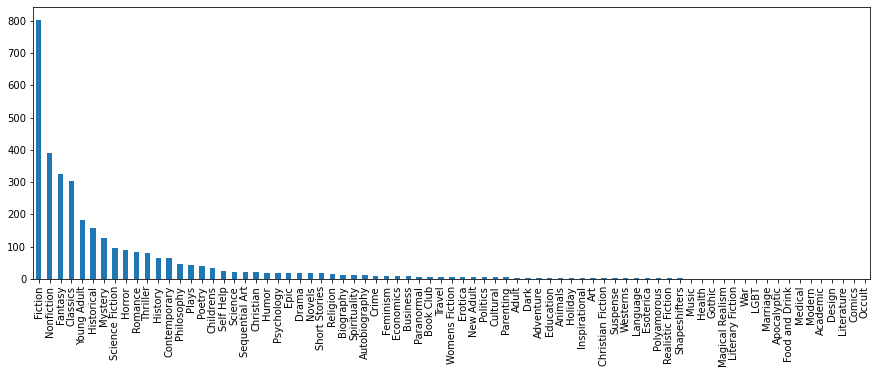

In [ ]:
books.Genre.value_counts().plot(x='genre',y = 'count',kind = 'bar',figsize = (15,5))

In [ ]:
#print the title and description of a random sample
print(books['Title'][4])
books['Description'][4]

The Little Prince


'A pilot stranded in the desert awakes one morning to see, standing before him, the most extraordinary little fellow. "Please," asks the stranger, "draw me a sheep." And the pilot realizes that when life\'s events are too difficult to understand, there is no choice but to succumb to their mysteries. He pulls out pencil and paper... And thus begins this wise and enchanting fa\r\nA pilot stranded in the desert awakes one morning to see, standing before him, the most extraordinary little fellow. "Please," asks the stranger, "draw me a sheep." And the pilot realizes that when life\'s events are too difficult to understand, there is no choice but to succumb to their mysteries. He pulls out pencil and paper... And thus begins this wise and enchanting fable that, in teaching the secret of what is really important in life, has changed forever the world for its readers.Few stories are as widely read and as universally cherished by children and adults alike as The Little Prince, presented here i

<Figure size 864x720 with 0 Axes>

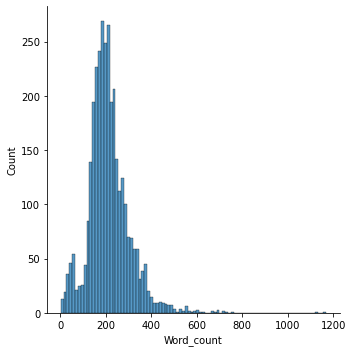

In [ ]:
#Calculating the word count for book description
import seaborn as sns
import matplotlib.pyplot as plt
books['Word_count'] = books['Description'].apply(lambda x: len(str(x).split()))# Plotting the word count
plt.figure(figsize=[12, 10])
sns.displot(books['Word_count'])

In [ ]:
books.head()

,Title,Author,Avg-Rating,Genre,Description,Word_count
0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,202
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,158
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,232
3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,187
4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...,195


### Data Preprocessing

In [ ]:
books.Genre.unique()

array(['Classics', 'Nonfiction', 'Historical', 'Fantasy', 'Fiction',
       'Young Adult', 'Childrens', 'Science Fiction', 'Poetry', 'Horror',
       'History', 'Mystery', 'Travel', 'Romance', 'Philosophy', 'Science',
       'Sequential Art', 'Christian', 'Academic', 'Self Help', 'Language',
       'Thriller', 'Religion', 'Plays', 'Cultural', 'Contemporary',
       'Drama', 'Autobiography', 'Esoterica', 'Short Stories', 'Crime',
       'Psychology', 'Feminism', 'Christian Fiction', 'Adventure',
       'Biography', 'Food and Drink', 'Spirituality', 'Paranormal',
       'Holiday', 'Novels', 'Epic', 'Inspirational', 'Apocalyptic',
       'Book Club', 'Realistic Fiction', 'Economics', 'Polyamorous',
       'Marriage', 'Education', 'Humor', 'Art', 'Business', 'Politics',
       'Womens Fiction', 'Health', 'New Adult', 'Erotica',
       'Shapeshifters', 'War', 'Design', 'Adult', 'Parenting', 'Gothic',
       'Animals', 'LGBT', 'Modern', 'Literature', 'Magical Realism',
       'Music', 'Dark'

In [ ]:
#filtering books with genres consiting more than 100 books
df = books[books['Genre'].map(books['Genre'].value_counts()) > 100]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2287 entries, 0 to 3351
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        2287 non-null   object 
 1   Author       2287 non-null   object 
 2   Avg-Rating   2287 non-null   float64
 3   Genre        2287 non-null   object 
 4   Description  2287 non-null   object 
 5   Word_count   2287 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 125.1+ KB


In [ ]:
df.Genre.value_counts()

Fiction        802
Nonfiction     391
Fantasy        324
Classics       302
Young Adult    182
Historical     159
Mystery        127
Name: Genre, dtype: int64

In [ ]:
# creating a sub dataframe of fiction books with  less than 160 word count.
df1 = df[(df.Genre == 'Fiction') & (df.Word_count <= 160)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 38 to 3350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        204 non-null    object 
 1   Author       204 non-null    object 
 2   Avg-Rating   204 non-null    float64
 3   Genre        204 non-null    object 
 4   Description  204 non-null    object 
 5   Word_count   204 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 11.2+ KB


In [ ]:
# dropping the  rows created in df2 from the df1 column.
df.drop(df1.index,axis=0,inplace=True)

C:\Users\himan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df.Genre.value_counts()

Fiction        598
Nonfiction     391
Fantasy        324
Classics       302
Young Adult    182
Historical     159
Mystery        127
Name: Genre, dtype: int64

array([<AxesSubplot:ylabel='Genre'>], dtype=object)

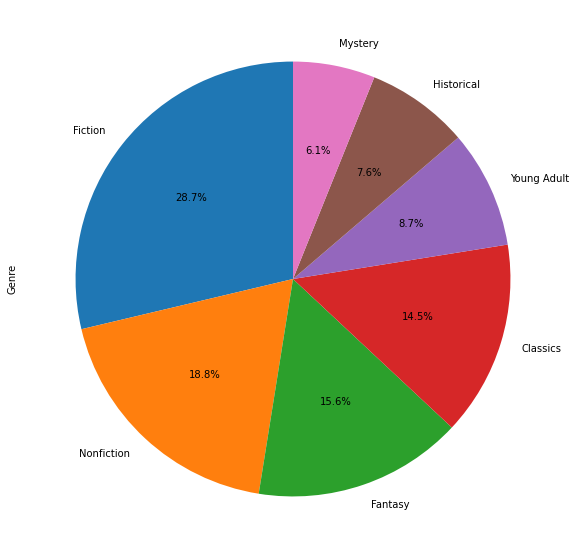

In [ ]:
df.Genre.value_counts().plot(kind='pie', subplots=True, startangle=90,
figsize=(15,10), autopct='%1.1f%%')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Genre_le'] = le.fit_transform(df.Genre)

<ipython-input-33-049cc9dc623b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Genre_le'] = le.fit_transform(df.Genre)


In [ ]:
df.Genre.unique()
df.head()

,Title,Author,Avg-Rating,Genre,Description,Word_count,Genre_le
0,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,202,0
1,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,158,0
2,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,232,5
3,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,187,0
4,The Little Prince,Antoine de Saint-Exupéry,4.31,Classics,A pilot stranded in the desert awakes one morn...,195,0


In [ ]:
df['Author'] = df['Author'].str.replace(" ","")
df['Tags'] = df['Author'] + " " + df['Description']
df.drop(['Word_count', 'Author', 'Description'], axis=1, inplace=True)
df['Tags'] = df['Tags'].apply(lambda x: x.lower())
df.head()

<ipython-input-35-3317338b3c91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Author'] = df['Author'].str.replace(" ","")
<ipython-input-35-3317338b3c91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tags'] = df['Author'] + " " + df['Description']
C:\Users\himan\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,Title,Avg-Rating,Genre,Genre_le,Tags
0,To Kill a Mockingbird,4.27,Classics,0,harperlee the unforgettable novel of a childho...
1,Pride and Prejudice,4.27,Classics,0,janeausten alternate cover edition of isbn 978...
2,The Diary of a Young Girl,4.17,Nonfiction,5,annefrank discovered in the attic in which she...
3,Animal Farm,3.97,Classics,0,georgeorwell librarian's note: there is an alt...
4,The Little Prince,4.31,Classics,0,antoinedesaint-exupéry a pilot stranded in the...


In [ ]:
#stemming
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stemming(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [ ]:
df['Tags'] = df['Tags'].apply(stemming)
df.head()

<ipython-input-37-2581147c87d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tags'] = df['Tags'].apply(stemming)


,Title,Avg-Rating,Genre,Genre_le,Tags
0,To Kill a Mockingbird,4.27,Classics,0,harperle the unforgett novel of a childhood in...
1,Pride and Prejudice,4.27,Classics,0,janeausten altern cover edit of isbn 978067978...
2,The Diary of a Young Girl,4.17,Nonfiction,5,annefrank discov in the attic in which she spe...
3,Animal Farm,3.97,Classics,0,georgeorwel librarian' note: there is an alter...
4,The Little Prince,4.31,Classics,0,antoinedesaint-exupéri a pilot strand in the d...


In [ ]:
# assign the independent features (text) to X variable and the target to y
X = pd.DataFrame(df['Tags'])
X

,Tags
0,harperle the unforgett novel of a childhood in...
1,janeausten altern cover edit of isbn 978067978...
2,annefrank discov in the attic in which she spe...
3,georgeorwel librarian' note: there is an alter...
4,antoinedesaint-exupéri a pilot strand in the d...
...,...
3344,theodoretaylor phillip is excit when the germa...
3345,andreahirata begitu banyak hal menakjubkan yan...
3346,w.somersetmaugham base on the life of paul gau...
3348,hollyblack thi is a previous publish cover edi...


In [ ]:
y = df['Genre_le']
y

0       0
1       0
2       5
3       0
4       0
       ..
3344    2
3345    2
3346    2
3348    1
3351    1
Name: Genre_le, Length: 2083, dtype: int32

In [ ]:
y.value_counts()

2    598
5    391
1    324
0    302
6    182
3    159
4    127
Name: Genre_le, dtype: int64

### Balancing The Data

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#performing oversampling on all genres except genre class  2
strategy = {0:400, 1:400, 2:598, 3:400, 4:400, 5:400,6:400}
os = RandomOverSampler(sampling_strategy = strategy)

In [ ]:
X1, y1 = os.fit_resample(X,y)

In [ ]:
from collections import Counter
print (Counter(y))

Counter({2: 598, 5: 391, 1: 324, 0: 302, 6: 182, 3: 159, 4: 127})


In [ ]:
print(Counter(y1))

Counter({2: 598, 0: 400, 5: 400, 3: 400, 1: 400, 6: 400, 4: 400})


In [ ]:
#performing undersampling on class 2
strategy = {0:400, 1:400, 2:400, 3:400, 4:400,5:400,6:400}
us = RandomUnderSampler(sampling_strategy = strategy)

In [ ]:
X_new, y_new = us.fit_resample(X1,y1)

In [ ]:
print(Counter(y_new))

Counter({0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400, 6: 400})


<AxesSubplot:>

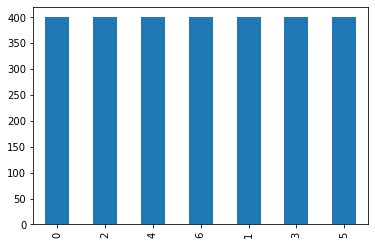

In [ ]:
y_new.value_counts().plot(x='y_new',y = 'count',kind = 'bar')

In [ ]:
y_new.shape

(2800,)

### Split the dataset into Training and Testing Datasets

In [ ]:
#split data into training 80% and test 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20)

print('Shape of training data:',(X_train.shape))
print('Shape of testing data:',(X_test.shape))

Shape of training data: (2240, 1)
Shape of testing data: (560, 1)


In [ ]:
X_train.head()

,Tags
2304,sophiaamoruso được ca ngợi như một “hiện tượng...
1222,marthahallkelli inspir by the life of a real w...
2056,kurtvonnegutjr. in a volum that is penetrating...
2463,"patrick three armi march on new prentisstown, ..."
2348,"maryroach in bonk, the best-sel author of stif..."


In [ ]:
x_train = X_train.iloc[:,0]
x_train.head()

2304    sophiaamoruso được ca ngợi như một “hiện tượng...
1222    marthahallkelli inspir by the life of a real w...
2056    kurtvonnegutjr. in a volum that is penetrating...
2463    patrick three armi march on new prentisstown, ...
2348    maryroach in bonk, the best-sel author of stif...
Name: Tags, dtype: object

### CountVectorizer - Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 10000)

In [ ]:
x = cv.fit_transform(x_train).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
x_test = X_test.iloc[:,0]
x_test.head()

128     williamshakespear tempest two gentlemen of ver...
2739    toddstrass the wave is base on a true incid th...
2339    robertfulghum robert fulghum engag with muse o...
97      georgeorwel thi edit featur georg orwell’ best...
1396    ammarhabib usa today bestselleravail in paperb...
Name: Tags, dtype: object

In [ ]:
test_x = cv.transform(x_test).toarray()
test_x.shape

(560, 10000)

## Model Building

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
clf1= MultinomialNB()
clf1.fit(x, y_train)
y_pred = clf1.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

Accuracy: 0.83
Other Metrics:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        69
           1       0.87      0.88      0.87        83
           2       0.60      0.64      0.62        83
           3       0.95      0.91      0.93        92
           4       0.95      0.92      0.93        77
           5       0.86      0.86      0.86        76
           6       0.80      0.88      0.84        80

    accuracy                           0.83       560
   macro avg       0.83      0.83      0.83       560
weighted avg       0.83      0.83      0.83       560



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[49  2 15  0  0  2  1]
 [ 2 73  2  1  0  0  5]
 [ 9  3 53  3  3  7  5]
 [ 0  0  4 84  0  0  4]
 [ 0  1  1  0 71  2  2]
 [ 2  0  9  0  0 65  0]
 [ 0  5  4  0  1  0 70]]


In [ ]:
model1= MultinomialNB()
model1.fit(test_x, y_test)
y_pred = model1.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.99
Other Metrics:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        69
           1       1.00      1.00      1.00        83
           2       0.99      1.00      0.99        83
           3       0.98      0.99      0.98        92
           4       1.00      1.00      1.00        77
           5       1.00      1.00      1.00        76
           6       0.98      1.00      0.99        80

    accuracy                           0.99       560
   macro avg       0.99      0.99      0.99       560
weighted avg       0.99      0.99      0.99       560

[[65  0  1  2  0  0  1]
 [ 0 83  0  0  0  0  0]
 [ 0  0 83  0  0  0  0]
 [ 0  0  0 91  0  0  1]
 [ 0  0  0  0 77  0  0]
 [ 0  0  0  0  0 76  0]
 [ 0  0  0  0  0  0 80]]


### Decision tree

In [ ]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf2= DecisionTreeClassifier()
clf2.fit(x, y_train)
y_pred = clf2.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

Accuracy: 0.68
Other Metrics:
              precision    recall  f1-score   support

           0       0.55      0.64      0.59        69
           1       0.66      0.69      0.67        83
           2       0.42      0.31      0.36        83
           3       0.85      0.85      0.85        92
           4       0.90      0.94      0.92        77
           5       0.62      0.38      0.47        76
           6       0.65      0.91      0.76        80

    accuracy                           0.68       560
   macro avg       0.66      0.67      0.66       560
weighted avg       0.67      0.68      0.66       560



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[44  6  8  0  1  3  7]
 [ 5 57 10  1  1  0  9]
 [10 13 26  6  2 11 15]
 [ 5  3  2 78  0  3  1]
 [ 1  2  2  0 72  0  0]
 [14  6 10  7  3 29  7]
 [ 1  0  4  0  1  1 73]]


In [ ]:
model2 = DecisionTreeClassifier()
model2.fit(test_x, y_test)
y_pred = model2.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Other Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        83
           2       1.00      1.00      1.00        83
           3       1.00      1.00      1.00        92
           4       1.00      1.00      1.00        77
           5       1.00      1.00      1.00        76
           6       1.00      1.00      1.00        80

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

[[69  0  0  0  0  0  0]
 [ 0 83  0  0  0  0  0]
 [ 0  0 83  0  0  0  0]
 [ 0  0  0 92  0  0  0]
 [ 0  0  0  0 77  0  0]
 [ 0  0  0  0  0 76  0]
 [ 0  0  0  0  0  0 80]]


### RandomForest

In [ ]:
clf3= RandomForestClassifier(max_depth=2, random_state=0)
clf3.fit(x, y_train)
y_pred = clf3.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

Accuracy: 0.54
Other Metrics:
              precision    recall  f1-score   support

           0       0.34      0.86      0.48        69
           1       0.70      0.39      0.50        83
           2       0.50      0.07      0.13        83
           3       0.82      0.35      0.49        92
           4       0.62      0.91      0.74        77
           5       0.60      0.67      0.63        76
           6       0.62      0.69      0.65        80

    accuracy                           0.54       560
   macro avg       0.60      0.56      0.52       560
weighted avg       0.61      0.54      0.51       560



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[59  0  0  2  3  2  3]
 [19 32  0  4  8  9 11]
 [37  5  6  0 14 12  9]
 [27  6  5 32  9  8  5]
 [ 4  0  0  0 70  0  3]
 [17  1  0  1  3 51  3]
 [13  2  1  0  6  3 55]]


In [ ]:
model3 = RandomForestClassifier(max_depth=2, random_state=0)
model3.fit(test_x, y_test)
y_pred = model3.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.48
Other Metrics:
              precision    recall  f1-score   support

           0       1.00      0.10      0.18        69
           1       0.77      0.59      0.67        83
           2       0.85      0.13      0.23        83
           3       0.26      0.99      0.41        92
           4       0.90      0.70      0.79        77
           5       0.96      0.36      0.52        76
           6       0.94      0.39      0.55        80

    accuracy                           0.48       560
   macro avg       0.81      0.47      0.48       560
weighted avg       0.79      0.48      0.48       560

[[ 7  1  0 61  0  0  0]
 [ 0 49  0 30  2  0  2]
 [ 0  4 11 66  1  1  0]
 [ 0  1  0 91  0  0  0]
 [ 0  1  0 22 54  0  0]
 [ 0  4  1 44  0 27  0]
 [ 0  4  1 41  3  0 31]]


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf4= KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf4.fit(x, y_train)
y_pred = clf4.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

Accuracy: 0.39
Other Metrics:
              precision    recall  f1-score   support

           0       0.21      0.90      0.34        69
           1       0.42      0.34      0.38        83
           2       0.28      0.16      0.20        83
           3       0.59      0.41      0.49        92
           4       0.93      0.52      0.67        77
           5       0.93      0.17      0.29        76
           6       0.71      0.31      0.43        80

    accuracy                           0.39       560
   macro avg       0.58      0.40      0.40       560
weighted avg       0.58      0.39      0.40       560



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[62  4  2  1  0  0  0]
 [40 28  3  6  1  1  4]
 [53  7 13  7  0  0  3]
 [32 11  9 38  1  0  1]
 [26  5  2  3 40  0  1]
 [34  7 15  6  0 13  1]
 [44  4  3  3  1  0 25]]


In [ ]:
model4 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model4.fit(test_x, y_test)
y_pred = model4.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.45
Other Metrics:
              precision    recall  f1-score   support

           0       0.32      0.77      0.45        69
           1       0.36      0.66      0.47        83
           2       0.38      0.34      0.36        83
           3       0.57      0.38      0.46        92
           4       0.67      0.49      0.57        77
           5       0.74      0.30      0.43        76
           6       0.90      0.24      0.38        80

    accuracy                           0.45       560
   macro avg       0.56      0.45      0.44       560
weighted avg       0.57      0.45      0.44       560

[[53  7  3  5  1  0  0]
 [13 55  7  3  1  3  1]
 [20 25 28  8  1  0  1]
 [24 11 15 35  4  3  0]
 [15 15  6  3 38  0  0]
 [15 15 13  6  4 23  0]
 [24 25  1  1  8  2 19]]


### Logistic Regresion

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf5 = LogisticRegression(max_iter=2000)
clf5.fit(x, y_train)
y_pred = clf5.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

Accuracy: 0.81
Other Metrics:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        69
           1       0.76      0.87      0.81        83
           2       0.71      0.43      0.54        83
           3       0.86      0.90      0.88        92
           4       0.96      0.95      0.95        77
           5       0.81      0.82      0.81        76
           6       0.85      0.89      0.87        80

    accuracy                           0.81       560
   macro avg       0.81      0.81      0.80       560
weighted avg       0.81      0.81      0.80       560



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[57  2  4  3  0  3  0]
 [ 2 72  3  1  0  1  4]
 [11  8 36  8  2 10  8]
 [ 2  5  2 83  0  0  0]
 [ 1  3  0  0 73  0  0]
 [ 6  1  6  0  0 62  1]
 [ 2  4  0  1  1  1 71]]


In [ ]:
model5 = LogisticRegression(max_iter=2000)
model5.fit(test_x, y_test)
y_pred = model5.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Other Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        83
           2       1.00      1.00      1.00        83
           3       1.00      1.00      1.00        92
           4       1.00      1.00      1.00        77
           5       1.00      1.00      1.00        76
           6       1.00      1.00      1.00        80

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

[[69  0  0  0  0  0  0]
 [ 0 83  0  0  0  0  0]
 [ 0  0 83  0  0  0  0]
 [ 0  0  0 92  0  0  0]
 [ 0  0  0  0 77  0  0]
 [ 0  0  0  0  0 76  0]
 [ 0  0  0  0  0  0 80]]


### SVM

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
clf6= SVC()
clf6.fit(x, y_train)
y_pred = clf6.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

Accuracy: 0.73
Other Metrics:
              precision    recall  f1-score   support

           0       0.52      0.86      0.65        69
           1       0.78      0.65      0.71        83
           2       0.54      0.43      0.48        83
           3       0.86      0.76      0.81        92
           4       0.97      0.90      0.93        77
           5       0.83      0.70      0.76        76
           6       0.74      0.88      0.80        80

    accuracy                           0.73       560
   macro avg       0.75      0.74      0.73       560
weighted avg       0.75      0.73      0.73       560



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[59  1  3  1  0  3  2]
 [ 9 54  7  2  0  2  9]
 [19  7 36  7  0  4 10]
 [ 6  4  8 70  0  1  3]
 [ 7  0  1  0 69  0  0]
 [10  1 11  0  0 53  1]
 [ 3  2  1  1  2  1 70]]


In [ ]:
model6 = SVC()
model6.fit(test_x, y_test)
y_pred = model6.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.85
Other Metrics:
              precision    recall  f1-score   support

           0       0.66      0.88      0.76        69
           1       0.92      0.78      0.84        83
           2       0.84      0.81      0.82        83
           3       0.87      0.87      0.87        92
           4       0.99      0.88      0.93        77
           5       0.97      0.83      0.89        76
           6       0.81      0.93      0.87        80

    accuracy                           0.85       560
   macro avg       0.86      0.85      0.85       560
weighted avg       0.87      0.85      0.86       560

[[61  2  2  1  0  0  3]
 [ 9 65  2  2  1  1  3]
 [ 3  2 67  6  0  0  5]
 [ 6  0  1 80  0  0  5]
 [ 4  0  3  0 68  1  1]
 [ 7  0  3  3  0 63  0]
 [ 2  2  2  0  0  0 74]]


### SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
clf7= SGDClassifier(early_stopping= True)
clf7.fit(x, y_train)
y_pred = clf7.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

Accuracy: 0.74
Other Metrics:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        69
           1       0.59      0.90      0.71        83
           2       0.75      0.04      0.07        83
           3       0.75      0.90      0.82        92
           4       0.88      0.92      0.90        77
           5       0.84      0.75      0.79        76
           6       0.78      0.89      0.83        80

    accuracy                           0.74       560
   macro avg       0.75      0.74      0.69       560
weighted avg       0.75      0.74      0.69       560



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[52  8  0  5  1  3  0]
 [ 0 75  0  0  1  1  6]
 [17 22  3 18  6  7 10]
 [ 2  4  0 83  1  0  2]
 [ 0  6  0  0 71  0  0]
 [ 5  8  1  3  0 57  2]
 [ 2  5  0  1  1  0 71]]


In [ ]:
model7 = SGDClassifier(early_stopping= True)
model7.fit(test_x, y_test)
y_pred = model7.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.91
Other Metrics:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        69
           1       0.76      0.98      0.86        83
           2       0.95      0.76      0.85        83
           3       1.00      0.82      0.90        92
           4       0.99      0.96      0.97        77
           5       0.93      0.97      0.95        76
           6       0.91      0.96      0.93        80

    accuracy                           0.91       560
   macro avg       0.92      0.91      0.91       560
weighted avg       0.92      0.91      0.91       560

[[65  1  0  0  0  2  1]
 [ 0 81  1  0  0  0  1]
 [ 6 12 63  0  0  1  1]
 [ 1  9  0 75  0  3  4]
 [ 0  1  1  0 74  0  1]
 [ 1  1  0  0  0 74  0]
 [ 0  1  1  0  1  0 77]]


### GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf8= GaussianNB()
clf8.fit(x, y_train)
y_pred = clf8.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

Accuracy: 0.75
Other Metrics:
              precision    recall  f1-score   support

           0       0.76      0.57      0.65        69
           1       0.88      0.71      0.79        83
           2       0.40      0.55      0.47        83
           3       0.94      0.89      0.92        92
           4       0.97      0.91      0.94        77
           5       0.55      0.70      0.62        76
           6       0.97      0.89      0.93        80

    accuracy                           0.75       560
   macro avg       0.78      0.75      0.76       560
weighted avg       0.79      0.75      0.76       560



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[39  1 20  2  0  7  0]
 [ 1 59 16  2  0  4  1]
 [ 7  3 46  1  1 25  0]
 [ 2  1  4 82  0  2  1]
 [ 0  0  5  0 70  2  0]
 [ 2  3 18  0  0 53  0]
 [ 0  0  5  0  1  3 71]]


In [ ]:
model8 = GaussianNB()
model8.fit(test_x, y_test)
y_pred = model8.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Other Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        83
           2       1.00      1.00      1.00        83
           3       1.00      1.00      1.00        92
           4       1.00      1.00      1.00        77
           5       1.00      1.00      1.00        76
           6       1.00      1.00      1.00        80

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560

[[69  0  0  0  0  0  0]
 [ 0 83  0  0  0  0  0]
 [ 0  0 83  0  0  0  0]
 [ 0  0  0 92  0  0  0]
 [ 0  0  0  0 77  0  0]
 [ 0  0  0  0  0 76  0]
 [ 0  0  0  0  0  0 80]]


### Neural Network

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    clf9 = Sequential()
    clf9.add(Dense(10, input_dim=10000, kernel_initializer='uniform', activation='relu'))
    clf9.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    clf9.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return clf9

In [ ]:
clf9 = KerasClassifier(build_fn=create_model,verbose = 0, batch_size = 10, epochs = 50 )
clf9.fit(x, y_train)
y_pred = clf9.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

C:\Users\himan\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Accuracy: 0.15
Other Metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.15      1.00      0.26        83
           2       0.00      0.00      0.00        83
           3       0.00      0.00      0.00        92
           4       0.00      0.00      0.00        77
           5       0.00      0.00      0.00        76
           6       0.00      0.00      0.00        80

    accuracy                           0.15       560
   macro avg       0.02      0.14      0.04       560
weighted avg       0.02      0.15      0.04       560



C:\Users\himan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\himan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[ 0 69  0  0  0  0  0]
 [ 0 83  0  0  0  0  0]
 [ 0 83  0  0  0  0  0]
 [ 0 92  0  0  0  0  0]
 [ 0 77  0  0  0  0  0]
 [ 0 76  0  0  0  0  0]
 [ 0 80  0  0  0  0  0]]


In [ ]:
model9 = KerasClassifier(build_fn=create_model,verbose = 0, batch_size = 10, epochs = 50 )
model9.fit(test_x, y_test)
y_pred = model7.predict(test_x)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

C:\Users\himan\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Accuracy: 0.91
Other Metrics:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        69
           1       0.76      0.98      0.86        83
           2       0.95      0.76      0.85        83
           3       1.00      0.82      0.90        92
           4       0.99      0.96      0.97        77
           5       0.93      0.97      0.95        76
           6       0.91      0.96      0.93        80

    accuracy                           0.91       560
   macro avg       0.92      0.91      0.91       560
weighted avg       0.92      0.91      0.91       560

[[65  1  0  0  0  2  1]
 [ 0 81  1  0  0  0  1]
 [ 6 12 63  0  0  1  1]
 [ 1  9  0 75  0  3  4]
 [ 0  1  1  0 74  0  1]
 [ 1  1  0  0  0 74  0]
 [ 0  1  1  0  1  0 77]]


In [ ]:
Model_Name = ['Multinomial NB', 'Logistic Regression', 'SGDClassifier', 'Guassian NB', 'SVM', 'Decision Tree', 'Random Forest', 'KNN', 'Neural Network']
Train_Accuracy = [0.85,0.84,0.81,0.74,0.74,0.67,0.54,0.40,0.15]
Test_Accuracy = [0.99,1.00,0.95,1.00,0.89,1.00,0.59,0.43,0.95]

In [ ]:
Model_Table = pd.DataFrame({'Model_Name' : Model_Name,
                            'Train_Accuracy' : Train_Accuracy,
                           'Test_Accuracy': Test_Accuracy})  

In [ ]:
Model_Table

,Model_Name,Train_Accuracy,Test_Accuracy
0,Multinomial NB,0.85,0.99
1,Logistic Regression,0.84,1.00
2,SGDClassifier,0.81,0.95
3,Guassian NB,0.74,1.00
4,SVM,0.74,0.89
5,Decision Tree,0.67,1.00
6,Random Forest,0.54,0.59
7,KNN,0.40,0.43
8,Neural Network,0.15,0.95


In [ ]:
#shape of the final dataframe
books.shape

(53, 8)

### EDA

In [ ]:
#checking null values
books.isnull().sum()

book_id           0
title             0
author            0
average_rating    0
genre             0
description       0
url               0
image_url         0
dtype: int64

In [ ]:
#checking duplicate rows
books.duplicated().sum()

0

In [ ]:
#dropping duplicates
books.drop_duplicates(keep = 'first',inplace = True)

In [ ]:
#check value count by genre
books.genre.value_counts()

Classics           30
Fantasy             6
Fiction             6
Childrens           3
Nonfiction          2
Science Fiction     2
Young Adult         2
Poetry              1
Historical          1
Name: genre, dtype: int64

### Distribution of data by Genre

<AxesSubplot:>

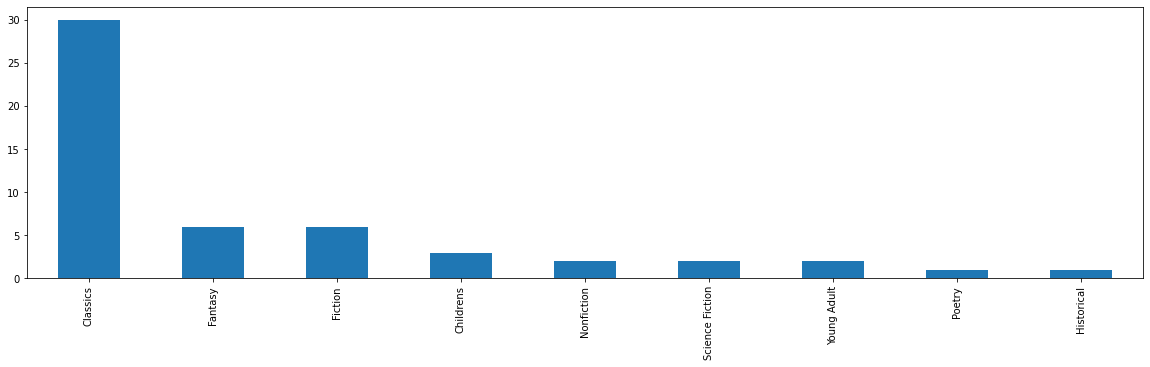

In [ ]:
books['genre'].value_counts().plot(x='genre',y = 'count',kind = 'bar',figsize = (20,5))

In [ ]:
#print the title and description of a random sample

print(books['title'][10])
books['description'][10]

The Book Thief


"Librarian's note: An alternate cover edition can be found hereIt is 1939. Nazi Germany. The country is holding its breath. Death has never been busier, and will be busier still.By her brother's graveside, Liesel's life is changed when she picks up a single object, partially hidden in the snow. It is The Gravedigger's Handbook, left behind there by accident, and it is her first act of book thievery. So begins a love affair with books and words, as Liesel, with the help of her accordian-playing foster father, learns to read. Soon she is stealing books from Nazi book-burnings, the mayor's wife's library, wherever there are books to be found.But these are dangerous times. When Liesel's foster family hides a Jew in their basement, Liesel's world is both opened up, and closed down.In superbly crafted writing that burns with intensity, award-winning author Markus Zusak has given us one of the most enduring stories of our time.(Note: this title was not published as YA fiction)"

In [ ]:
#print the title and description of a random sample

books.duplicated().sum()

0

<Figure size 864x720 with 0 Axes>

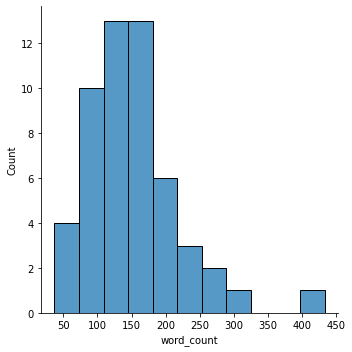

In [ ]:
#Calculating the word count for book description and adding a new column to the dataframe

import seaborn as sns
import matplotlib.pyplot as plt

books['word_count'] = books['description'].apply(lambda x: len(str(x).split()))  # Plotting the word count
plt.figure(figsize=[12, 10])
sns.displot(books['word_count'])

In [ ]:
books.head()

,book_id,title,author,average_rating,genre,description,url,image_url,word_count
0,2657,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...,137
1,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter's life is miserable. His parents ...,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...,220
2,1885,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...,100
3,48855,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...,166
4,170448,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...,123


### Data Preprocessing

In [ ]:
books['genre'].unique()

array(['Classics', 'Fantasy', 'Nonfiction', 'Historical', 'Fiction',
       'Young Adult', 'Childrens', 'Science Fiction', 'Poetry'],
      dtype=object)

In [ ]:
#filtering #1  books with genres consiting more than 100 books
df = books[books['genre'].map(books['genre'].value_counts()) > 100]

In [ ]:
df['genre'].value_counts()

Series([], Name: genre, dtype: int64)

In [ ]:
# creating a sub dataframe of fiction books with  less than 160 word count.
# As description is our main criteria for model accuracy and prediction , we are removing the books which has low word count.
df2 = df[(df.genre == 'Fiction') & (df.word_count <= 160)]
# dropping the  rows created in df2 from the df column.
df.drop(df2.index,axis=0,inplace=True)

In [ ]:
df.genre.value_counts()
# Updated genre count.

Series([], Name: genre, dtype: int64)

array([<AxesSubplot:ylabel='genre'>], dtype=object)

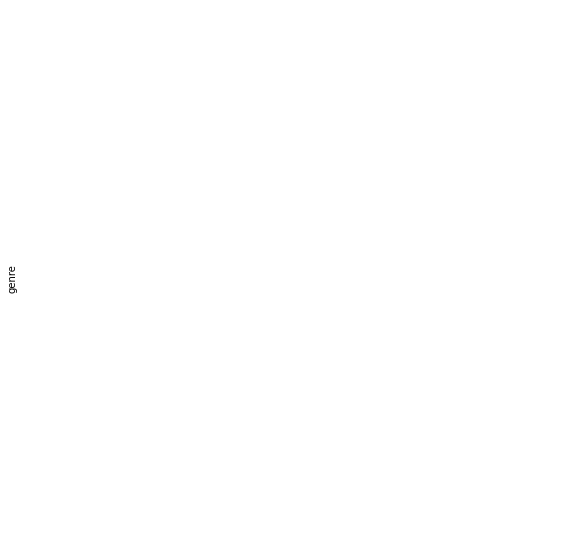

In [ ]:
df.genre.value_counts().plot(kind='pie', subplots=True, startangle=90,
figsize=(15,10), autopct='%1.1f%%')

In [ ]:
# Label encoding the Class column : Abusive = 0 and Non Abusive = 1

le = preprocessing.LabelEncoder()
df['genre_le'] = le.fit_transform(df.genre)

In [ ]:
df.genre.unique()
df.head()

,book_id,title,average_rating,genre,url,image_url,genre_le,tags


In [ ]:
df['author'] = df['author'].str.replace(" ","")
df['tags'] = df['author'] + " " + df['description']
df.drop(['word_count', 'author', 'description'], axis=1, inplace=True)
df['tags'] = df['tags'].apply(lambda x: x.lower())
df.head()

KeyError: 'author'

In [ ]:
#stemming
ps = PorterStemmer()

In [ ]:
def stemming(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [ ]:
df['tags'] = df['tags'].apply(stemming)
df.head()

,book_id,title,average_rating,genre,url,image_url,genre_le,tags


In [ ]:
# assign the independent features (text) to X variable and the target to y
X = pd.DataFrame(df['tags'])
y = df['genre_le']

In [ ]:
y

Series([], Name: genre_le, dtype: float64)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
y.value_counts()

Series([], Name: genre_le, dtype: int64)

In [ ]:
#performing oversampling on all genres except genre class  2
strategy = {0:400, 1:400, 2:598, 3:400, 4:400, 5:400,6:400}
os = RandomOverSampler(sampling_strategy = strategy)

In [ ]:
X_rs, y_rs = os.fit_resample(X,y)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [ ]:
from collections import Counter
print(Counter(y))

Counter()


In [ ]:
print(Counter(y_rs))

NameError: name 'y_rs' is not defined

In [ ]:
#performing undersampling on class 2
strategy = {0:400, 1:400, 2:400, 3:400, 4:400,5:400,6:400}
us = RandomUnderSampler(sampling_strategy = strategy)

In [ ]:
X_new, y_new = us.fit_resample(X_rs,y_rs)

NameError: name 'X_rs' is not defined

In [ ]:
print(Counter(y_new))

NameError: name 'y_new' is not defined

In [ ]:
y_new.value_counts().plot(x='y_new',y = 'count',kind = 'bar')

NameError: name 'y_new' is not defined

In [ ]:
y_new.shape

NameError: name 'y_new' is not defined

### Split the dataset into Train and Test sets

In [ ]:
#split data into training 80% and test 20%
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20, random_state=2021)

NameError: name 'X_new' is not defined

In [ ]:
X_train.head()

NameError: name 'X_train' is not defined

In [ ]:
x_train = X_train.iloc[:,0]
x_train.head()

NameError: name 'X_train' is not defined

### CountVectorizer - Feature Extraction

In [ ]:
#using countvectorizer
cv = CountVectorizer(max_features = 10000)

In [ ]:
x = cv.fit_transform(x_train).toarray()
x

NameError: name 'x_train' is not defined

In [ ]:
x_test = X_test.iloc[:,0]
x_test.head()

NameError: name 'X_test' is not defined

In [ ]:
test_x = cv.transform(x_test).toarray()
test_x.shape

NameError: name 'x_test' is not defined

### Model Fitting

In [ ]:
# Creating empty lists to store model training time, model predicting time, model accuracy scores, model precision scores.
training_time = []
predicting_time = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [ ]:
model1 = MultinomialNB()

In [ ]:
#train model and predict model training time
t0 = time()
model1.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
# Predit using the trained model
t1 = time()
predicted = model1.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))

NameError: name 'y_test' is not defined

In [ ]:
model2 = GaussianNB()

In [ ]:
#train model and predict model training time
t0 = time()
model2.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
# Predit using the trained model
t1 = time()
predicted = model2.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))

NameError: name 'y_test' is not defined

In [ ]:
model3 = tree.DecisionTreeClassifier()

In [ ]:
#train model and predict model training time
t0 = time()
model3.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
# Predit using the trained model
t1 = time()
predicted = model3.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))

NameError: name 'y_test' is not defined

In [ ]:
model5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [ ]:
#train model and predict model training time
t0 = time()
model5.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
# Predit using the trained model
t1 = time()
predicted = model5.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))

NameError: name 'y_test' is not defined

In [ ]:
model6 = LogisticRegression(max_iter=2000)

In [ ]:
#train model and predict model training time
t0 = time()
model6.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
# Predit using the trained model
t1 = time()
predicted = model6.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))

NameError: name 'y_test' is not defined

In [ ]:
model7 = SVC(kernel='linear',gamma='auto')

In [ ]:
#train model and predict model training time
t0 = time()
model7.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
# Predit using the trained model
t1 = time()
predicted = model7.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))

NameError: name 'y_test' is not defined

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

# create model
def create_model():
    model8 = Sequential()
    model8.add(Dense(10, input_dim=10000, kernel_initializer='uniform', activation='relu'))
    model8.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model8.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model8

# Create the model

model8 = KerasClassifier(build_fn=create_model,verbose = 0, batch_size = 10, epochs = 50 )

In [ ]:
t0 = time()
nn = model8.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
t1 = time()
pred = model8.predict(test_x).round(1) 
predicting_time.append(round(time()-t1, 3))

print(pred[0:5]) 

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,pred))

accuracy_scores.append(accuracy_score(y_test,pred).round(2))

print("Classification Report:\n",classification_report(y_test, pred))
clf_rep = precision_recall_fscore_support(y_test,pred)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, pred))

NameError: name 'y_test' is not defined

In [ ]:
model4 = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
#train model and predict model training time
t0 = time()
model4.fit(x, y_train)
print("\nTraining time:", round(time()-t0, 3), "s\n")
training_time.append(round(time()-t0, 3))

NameError: name 'x' is not defined

In [ ]:
# Predit using the trained model
t1 = time()
predicted = model4.predict(test_x)
print("Predicting time:", round(time()-t1, 3), "s\n")
predicting_time.append(round(time()-t1, 3))

NameError: name 'test_x' is not defined

In [ ]:
## Evaluate model - Accuracy, Precision, Recall
from sklearn.metrics import precision_recall_fscore_support

print('\nAccuracy Score',accuracy_score(y_test,predicted))

accuracy_scores.append(accuracy_score(y_test,predicted).round(2))

print("Classification Report:\n",classification_report(y_test, predicted))
clf_rep = precision_recall_fscore_support(y_test,predicted)
precision_scores.append(clf_rep[0][0].round(2))
recall_scores.append(clf_rep[1][0].round(2))
f1_scores.append(clf_rep[2][0].round(2))

## Plot confusion matrix
print("confusion matrix:\n",confusion_matrix(y_test, predicted))

NameError: name 'y_test' is not defined

In [ ]:
model_name = ['Multinomial Bayes','Gaussian Bayes','Decision Tree','RandomForest','KNN','Logistic Regression','SVM','Neural Network']

In [ ]:
performance_table = pd.DataFrame({'Model_name' : model_name,
                            'Training time' : training_time,
                            'Prediction time' : predicting_time,
                            'Accuracy' : accuracy_scores,
                            'Precision' : precision_scores,
                            'Recall' : recall_scores,
                            'F1-scores' : f1_scores}).sort_values('F1-scores',ascending=False)

ValueError: arrays must all be same length

In [ ]:
performance_table

NameError: name 'performance_table' is not defined

In [ ]:
rec = ["A comet the color of blood and flame cuts across the sky. Two great leaders—Lord Eddard Stark and Robert Baratheon—who hold sway over an age of enf

SyntaxError: EOL while scanning string literal (<ipython-input-91-01e5af21392c>, line 1)

In [ ]:
t = cv.transform(rec).toarray()

NameError: name 'rec' is not defined

In [ ]:
pr = le.inverse_transform(model1.predict(t))

NameError: name 't' is not defined

In [ ]:
pr[0]

NameError: name 'pr' is not defined

In [ ]:
def recommend(genre):
    recommended_books = df[df['genre'] == genre].sort_values(by = 'average_rating',ascending = False).head()
    print(recommended_books.title)
        
    return

In [ ]:
recommend('Fantasy')

Series([], Name: title, dtype: object)
